In [24]:
# importing data
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# importing dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [25]:
dfj = ["Data Analyst", "Data Scientist", "Data Engineer"]
df_fil = df[df["job_title_short"].isin(dfj)]

In [26]:
df_fil = df_fil.groupby(["job_title_short", "job_schedule_type"]).agg(job_count = ("job_title_short", "size"), salary_median = ("salary_year_avg", "median"))
df_fil = df_fil.reset_index()

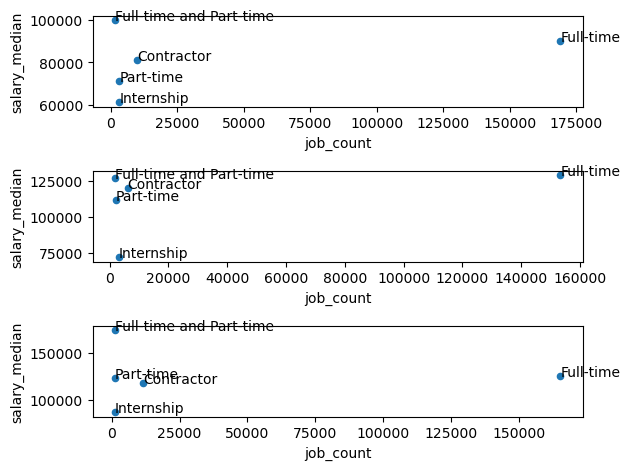

In [37]:
df_fil = df_fil.sort_values(by="job_count", ascending=False)

job_num = 5
fig, ax = plt.subplots(3, 1)
for i, job in enumerate(dfj):
    jobs = df_fil[df_fil["job_title_short"] == job].head(job_num)
    jobs.plot(kind="scatter", x="job_count", y="salary_median", ax=ax[i])
    
    for j in range(len(jobs)):
        ax[i].text(jobs["job_count"].iloc[j],
                   jobs["salary_median"].iloc[j],
                   jobs["job_schedule_type"].iloc[j])

fig.tight_layout()